In [43]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
class_names = [
  'T-shirts/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

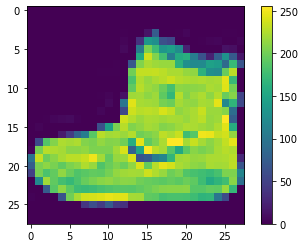

In [46]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
train_images = train_images / 255.0
test_images = test_images / 255.0

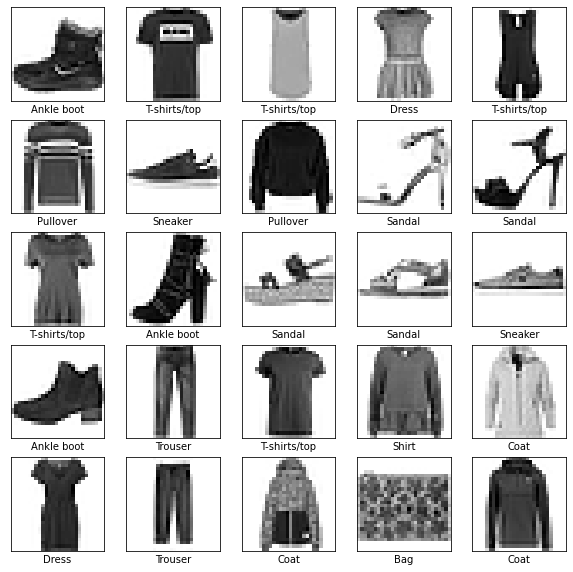

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [49]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [51]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6396 - accuracy: 0.7790
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3905 - accuracy: 0.8593
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3474 - accuracy: 0.8725
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3117 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2908 - accuracy: 0.8912


In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3660 - accuracy: 0.8680
Test accuracy 0.8679999709129333


In [53]:
predictions = model.predict(test_images)

In [61]:
def plot_images(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red'
  plt.xlabel("{} :{:2.0f}% ({})".format(
    class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]
  ), color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#77777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')
  plt.xticks(range(10), class_names, rotation=45)

  

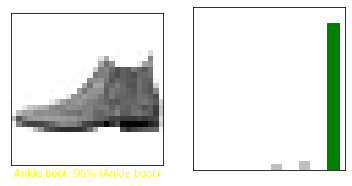

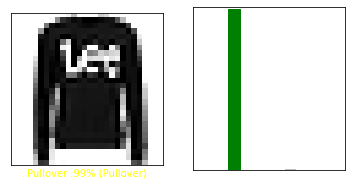

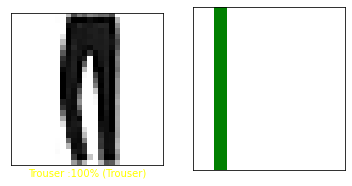

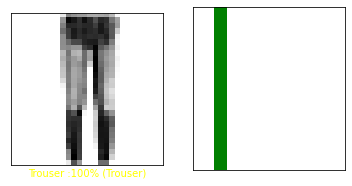

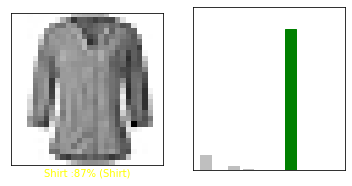

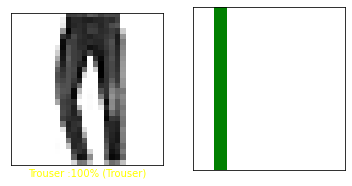

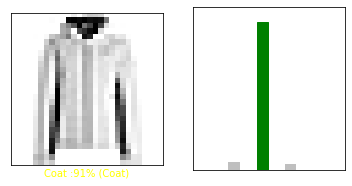

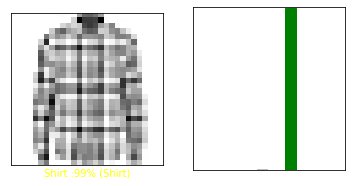

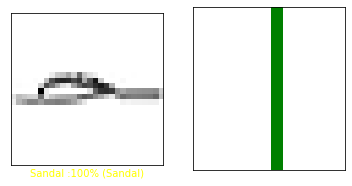

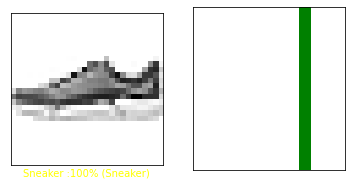

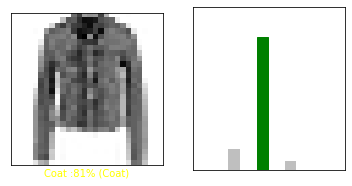

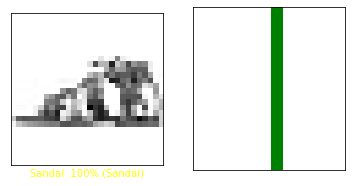

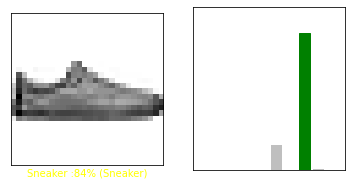

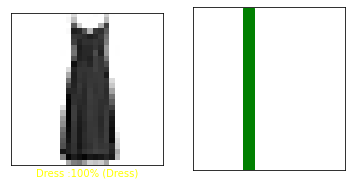

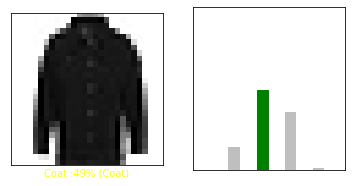

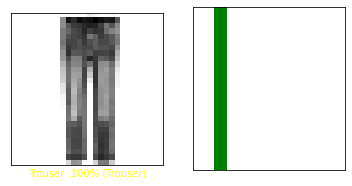

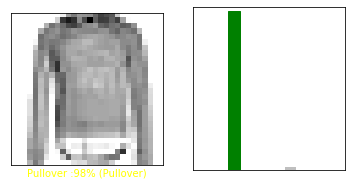

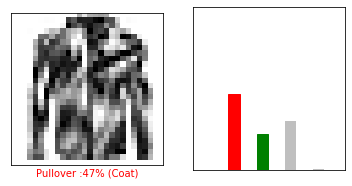

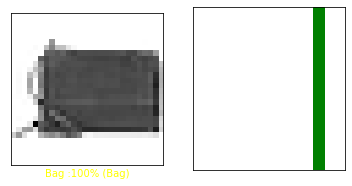

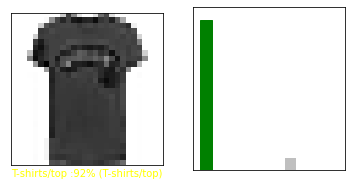

In [71]:
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_images(i, predictions,test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions, test_labels)
  plt.show()

In [66]:
img = test_images[0]
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [68]:
predictions_single = model.predict(img)
np.argmax(predictions_single) 

9

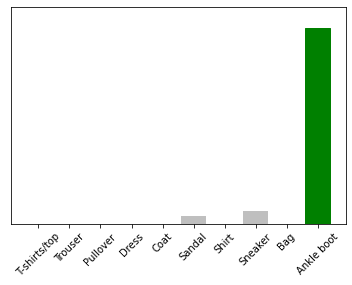

In [70]:
plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)